<a href="https://colab.research.google.com/github/MalithaPrabhashana/patternRecognitionCNN/blob/main/EN3150_Emeralds_A03_zip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Real Waste Dataset**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import zipfile
import shutil
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to your dataset zip file in Google Drive
zip_path = '/content/drive/My Drive/Colab Notebooks/S5-EN3150 - Pattern Recognition/CNN_Waste_Classification/realwaste.zip'

# Unzipping the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/Colab Notebooks/S5-EN3150 - Pattern Recognition/CNN_Waste_Classification/RealWaste')

['realwaste-main']

In [19]:
unzipped_dir = "/content/drive/My Drive/Colab Notebooks/S5-EN3150 - Pattern Recognition/CNN_Waste_Classification/RealWaste/realwaste-main/RealWaste"

# Check if the dataset has been successfully extracted
os.listdir(unzipped_dir)

['Cardboard',
 'Food Organics',
 'Glass',
 'Metal',
 'Miscellaneous Trash',
 'Paper',
 'Plastic',
 'Textile Trash',
 'Vegetation']

In [ ]:
# Dictionary to store the count of images in each class
class_image_counts = {}

# Loop through each class folder
for class_folder in os.listdir(unzipped_dir):
    class_path = os.path.join(unzipped_dir, class_folder)

    if os.path.isdir(class_path):  # Check if it's a directory
        # Count the number of files in the class folder
        num_images = len(os.listdir(class_path))
        class_image_counts[class_folder] = num_images

# Print the counts for each class
for class_name, count in class_image_counts.items():
    print(f"Class: {class_name}, Number of images: {count}")

Class: Cardboard, Number of images: 461
Class: Food Organics, Number of images: 411
Class: Glass, Number of images: 420
Class: Metal, Number of images: 790
Class: Miscellaneous Trash, Number of images: 495
Class: Paper, Number of images: 500
Class: Plastic, Number of images: 921
Class: Textile Trash, Number of images: 318
Class: Vegetation, Number of images: 436


In [36]:
# Set paths
dataset_dir = unzipped_dir
classes = os.listdir(dataset_dir)

# Create directories for train, val, and test splits
base_dir = '/content/drive/My Drive/Colab Notebooks/S5-EN3150 - Pattern Recognition/CNN_Waste_Classification/SplittedWasteData'
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create folders for each class in train, val, and test directories
for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Split the dataset for each class
for class_name in classes:
    class_path = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_path)
    np.random.shuffle(images)

    # Split images into 60% train, 20% validation, 20% test
    train_images, test_images = train_test_split(images, test_size=0.4, random_state=42)
    val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

    # Move images to the respective directories
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

print("Dataset split completed!")

Dataset split completed!


In [60]:
base_dir = '/content/drive/My Drive/Colab Notebooks/S5-EN3150 - Pattern Recognition/CNN_Waste_Classification/SplittedWasteData'

In [61]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [63]:
train_dataset = train.flow_from_directory(base_dir+"/train",
                                          target_size=(150, 150),
                                          batch_size=32,
                                          class_mode='categorical')

validation_dataset = validation.flow_from_directory(base_dir+"/val",
                                          target_size=(150, 150),
                                          batch_size=32,
                                          class_mode='categorical')

Found 2848 images belonging to 9 classes.
Found 950 images belonging to 9 classes.


In [42]:
print("Training Dataset: ", train_dataset.samples)
print("Validation Dataset: ", validation_dataset.samples)

Training Dataset:  261
Validation Dataset:  90


In [64]:
class_indices = train_dataset.class_indices
print(class_indices)

{'Cardboard': 0, 'Food Organics': 1, 'Glass': 2, 'Metal': 3, 'Miscellaneous Trash': 4, 'Paper': 5, 'Plastic': 6, 'Textile Trash': 7, 'Vegetation': 8}


[0. 1. 0. 0. 0. 0. 0. 0. 0.]
[[[0.81568635 0.8078432  0.8117648 ]
  [0.5019608  0.49411768 0.49803925]
  [0.72156864 0.7137255  0.7176471 ]
  ...
  [0.9725491  0.9725491  0.9725491 ]
  [0.8352942  0.8313726  0.8235295 ]
  [0.40000004 0.4039216  0.37254903]]

 [[0.78823537 0.78823537 0.78823537]
  [0.28627452 0.28627452 0.28627452]
  [0.5647059  0.5647059  0.57254905]
  ...
  [0.69803923 0.69803923 0.69803923]
  [0.65882355 0.6509804  0.654902  ]
  [0.49803925 0.49411768 0.48627454]]

 [[0.9607844  0.9686275  0.96470594]
  [0.95294124 0.9607844  0.9568628 ]
  [0.5882353  0.5921569  0.6       ]
  ...
  [0.7294118  0.73333335 0.7137255 ]
  [0.98823535 0.9843138  0.97647065]
  [0.39607847 0.3921569  0.38431376]]

 ...

 [[0.7803922  0.78823537 0.7843138 ]
  [0.9568628  0.9607844  0.97647065]
  [0.6117647  0.6117647  0.6117647 ]
  ...
  [0.81568635 0.8196079  0.8000001 ]
  [0.6        0.59607846 0.5803922 ]
  [0.6745098  0.67058825 0.654902  ]]

 [[0.6117647  0.6039216  0.60784316]
  [0.450

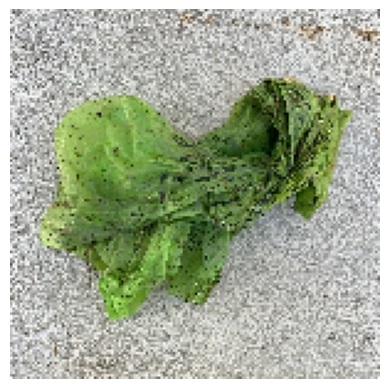

In [65]:
# Load one batch of images and labels
X_batch, y_batch = next(train_dataset)

# Display the first image from the batch
print(y_batch[0])
print(X_batch[0])
plt.imshow(X_batch[0])
plt.axis('off')
plt.show()

In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    #
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    ##
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=9, activation='softmax')
])

In [68]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
model_fit = model.fit(
    train_dataset,
    steps_per_epoch=train_dataset.samples // train_dataset.batch_size,
    validation_data=validation_dataset,
    epochs=5
)

Epoch 1/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 880s 10s/step - accuracy: 0.1799 - loss: 2.9242 - val_accuracy: 0.2832 - val_loss: 1.9910
Epoch 2/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2832 - val_loss: 1.9910
Epoch 3/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 63s 322ms/step - accuracy: 0.2584 - loss: 2.0116 - val_accuracy: 0.3221 - val_loss: 1.8366
Epoch 4/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3221 - val_loss: 1.8366
Epoch 5/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 27s 284ms/step - accuracy: 0.3289 - loss: 1.8138 - val_accuracy: 0.3432 - val_loss: 1.7133
